In [1]:
import pandas as pd
import numpy as np
from functools import reduce

In [2]:
import matplotlib.pyplot as plt

In [3]:
the = pd.read_csv('Real_GDP_per_capita.csv',thousands=',')

In [4]:
the['value'] = the['value'].replace('[\$,]', '', regex=True).astype(float)

In [5]:
gdp = the.drop(columns=["slug","date_of_information","region","ranking"])

In [71]:
gdp.rename(columns={'value': 'gdp'}, inplace=True)

In [72]:
gdp.head(15)

,name,gdp
0,Liechtenstein,139100.0
1,Monaco,115700.0
2,Luxembourg,115700.0
3,Singapore,106000.0
4,Ireland,102500.0
5,Qatar,92900.0
6,Isle of Man,84600.0
7,Bermuda,80300.0
8,Switzerland,71000.0
9,Falkland Islands (Islas Malvinas),70800.0


In [73]:
life = pd.read_csv('Life_expectancy_at_birth.csv')

In [74]:
life.head()

,name,slug,years,date_of_information,ranking,region
0,Monaco,monaco,89.6,2023,1,Europe
1,Singapore,singapore,86.5,2023,2,East and Southeast Asia
2,Macau,macau,85.2,2023,3,East and Southeast Asia
3,Japan,japan,85.0,2023,4,East and Southeast Asia
4,San Marino,san-marino,84.1,2023,5,Europe


In [75]:
real_gdp = pd.read_csv("Real_GDP.csv")
real_gdp['value'] = real_gdp['value'].replace('[\$,]', '', regex=True).astype(float)
total_gdp = real_gdp.drop(columns=["slug","date_of_information","region","ranking"])
total_gdp.rename(columns={'value': 'total_gdp'}, inplace=True)

In [76]:
total_gdp.head()

,name,total_gdp
0,China,2.486100e+13
1,United States,2.113200e+13
2,India,9.279000e+12
3,Japan,5.126000e+12
4,Germany,4.523000e+12


In [77]:
unemployment = pd.read_csv("Unemployment_rate.csv")

In [78]:
un = unemployment.drop(columns=["slug","date_of_information","region","ranking"])

In [79]:
un.head()

,name,%
0,Cocos (Keeling) Islands,0.10
1,Qatar,0.26
2,Cambodia,0.61
3,Niger,0.75
4,Falkland Islands (Islas Malvinas),1.00


In [80]:
debt_external = pd.read_csv("debt_external.csv")
debt_external['value'] = debt_external['value'].replace('[\$,]', '', regex=True).astype(float)
debt = debt_external.drop(columns=["slug","date_of_information","region","ranking"])
debt.rename(columns={'value': 'debt'}, inplace=True)

In [81]:
debt.head()

,name,debt
0,United States,2.027595e+13
1,United Kingdom,8.722000e+12
2,France,6.356000e+12
3,Germany,5.671463e+12
4,Netherlands,4.345413e+12


In [82]:
people = pd.read_csv("population.csv")
population = people.drop(columns=["slug","date_of_information","region","ranking"])
population.rename(columns={'value': 'population'}, inplace=True)

In [83]:
population.head()

,name,population
0,China,"1,413,142,846"
1,India,"1,399,179,585"
2,United States,"339,665,118"
3,Indonesia,"279,476,346"
4,Pakistan,"247,653,551"


In [88]:
education_expenditures = pd.read_csv("education_expenditures.csv")
education_expenditures.head()

,name,slug,% of GDP,date_of_information,ranking,region
0,Marshall Islands,marshall-islands,13.6,2020,1,Australia and Oceania
1,Solomon Islands,solomon-islands,12.8,2020,2,Australia and Oceania
2,Kiribati,kiribati,12.4,2019,3,Australia and Oceania
3,Greenland,greenland,10.2,2019,4,North America
4,Bolivia,bolivia,9.8,2020,5,South America


In [89]:
education_expenditures = pd.read_csv("education_expenditures.csv")
edu_exp = education_expenditures.drop(columns=["slug","date_of_information","region","ranking"])
edu_exp.rename(columns={'% of GDP': 'education_expenditures % of GDP'}, inplace=True)

In [90]:
edu_exp.head()

,name,education_expenditures % of GDP
0,Marshall Islands,13.6
1,Solomon Islands,12.8
2,Kiribati,12.4
3,Greenland,10.2
4,Bolivia,9.8


In [94]:
dfs = [gdp,life,total_gdp,un,debt,population,edu_exp]

In [95]:
merge_df = reduce(lambda left, right:pd.merge(left,right, on='name',how='inner'),dfs)

In [96]:
merge_df.head(15)

,name,gdp,slug,years,date_of_information,ranking,region,total_gdp,%,debt,population,education_expenditures % of GDP
0,Liechtenstein,139100.0,liechtenstein,82.8,2023,21,Europe,4.978000e+09,2.40,0.000000e+00,"39,993",2.6
1,Luxembourg,115700.0,luxembourg,83.2,2023,14,Europe,7.404500e+10,5.23,4.266792e+12,"660,924",5.0
2,Singapore,106000.0,singapore,86.5,2023,2,East and Southeast Asia,5.782540e+11,3.62,1.557646e+12,"5,975,383",2.8
3,Ireland,102500.0,ireland,82.2,2023,29,Europe,5.158800e+11,6.63,2.829000e+12,"5,323,991",3.1
4,Qatar,92900.0,qatar,80.0,2023,54,Middle East,2.496360e+11,0.26,1.678000e+11,"2,532,104",3.2
5,Bermuda,80300.0,bermuda,82.3,2023,28,North America,5.127000e+09,7.00,2.515000e+09,"72,576",1.9
6,Switzerland,71000.0,switzerland,83.8,2023,7,Europe,6.182280e+11,5.32,1.909000e+12,"8,563,760",5.2
7,United Arab Emirates,69700.0,united-arab-emirates,79.8,2023,58,Middle East,6.530670e+11,3.36,2.376000e+11,"9,973,449",3.9
8,Norway,67500.0,norway,83.0,2023,16,Europe,3.681510e+11,4.99,6.510400e+11,"5,597,924",5.9
9,Macau,64800.0,macau,85.2,2023,3,East and Southeast Asia,4.449000e+10,3.01,0.000000e+00,"639,971",6.3


In [97]:
print(merge_df.columns)

Index(['name', 'gdp', 'slug', ' years', 'date_of_information', 'ranking',
       'region', 'total_gdp', '%', 'debt', 'population',
       'education_expenditures % of GDP'],
      dtype='object')


In [99]:
independent = merge_df['gdp']

In [100]:
dependent = merge_df[' years']

In [101]:
X = independent.values.reshape(-1,1)

In [102]:
y = dependent.values.reshape(-1,1)

In [103]:
#data1 = data[data['class'] =='Abnormal']

In [104]:
#X = X.flatten() if isinstance(X, np.ndarray) else X
#y = y.flatten() if isinstance(y, np.ndarray) else y

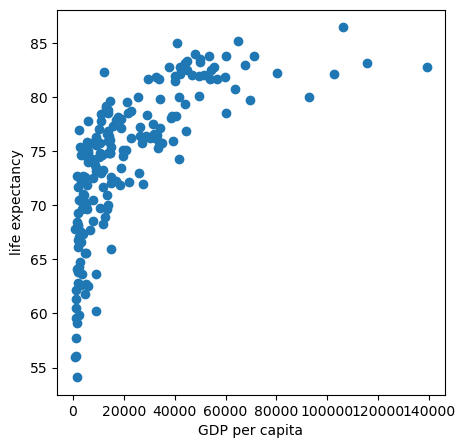

In [105]:
plt.figure(figsize=[5,5])
plt.scatter(x=X,y=y)
plt.xlabel('GDP per capita')
plt.ylabel('life expectancy')
plt.show()

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
reg = LinearRegression()

In [108]:
reg.fit(X,y)

LinearRegression()

In [109]:
predictions = reg.predict(X)

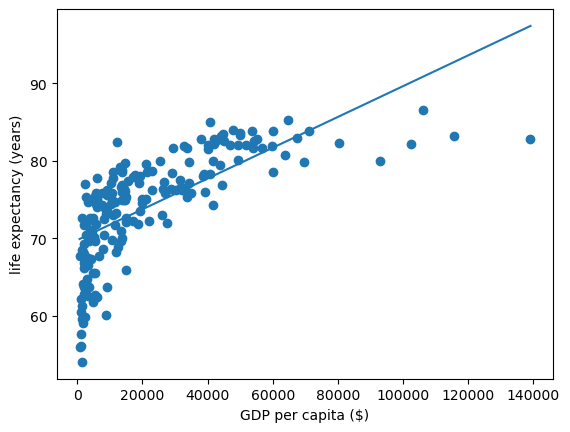

In [110]:
plt.scatter(X,y)
plt.plot(X, predictions)
plt.ylabel("life expectancy (years)")
plt.xlabel("GDP per capita ($)")
plt.show()